# Clustering-Based Water Quality Classification 

In this section, we aim to classify the water quality dataset using unsupervised learning techniques. Unlike the previous rule-based approach, clustering allows the data to define natural groupings based on patterns in the water quality parameters.

Objectives:

1) Load the preprocessed and scaled dataset.

2) Apply clustering algorithms such as K-Means to identify distinct water quality groups.

3) Visualize the clusters using dimensionality reduction (PCA) for interpretability.

4) Compare clustering results with the rule-based labels to evaluate consistency and insights.

Rationale:

1) Clustering provides a data-driven approach to group water samples, which may reveal hidden patterns not captured by predefined thresholds.

2) Using scaled features ensures that variables with larger numeric ranges do not dominate the clustering.

3) Comparison with rule-based classification helps validate both approaches and provides a comprehensive view of water quality.

In [12]:
# --- Step 1: Load necessary libraries ---
import pandas as pd
import numpy as np

# For clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Load the scaled dataset ---
df_scaled = pd.read_csv("water_dataX_scaled.csv", encoding='utf-8')  # replace with your actual file path

# --- Step 3: Check the data ---
print("Scaled dataset shape:", df_scaled.shape)
print("First 10 rows:")
df_scaled.head(10)


Scaled dataset shape: (1991, 12)
First 10 rows:


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,1.090909,0.00,0.285714,0.040858,0.000000,-0.452174,-0.358056,-0.279379,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,0.848485,-0.80,-0.142857,0.012257,0.043125,-0.343478,8.068201,5.019322,2014
2,1475,ZUARI AT PANCHAWADI,GOA,0.757576,-0.32,-0.571429,-0.008172,-0.081875,-0.452174,5.152600,3.080139,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,0.818182,-0.72,-0.571429,-0.243105,0.793125,-0.017391,8.799659,5.052265,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,0.757576,-0.72,0.000000,-0.204290,0.001458,-0.126087,5.468031,3.187837,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,0.909091,-0.96,0.142857,-0.208376,-0.165208,-0.452174,4.487639,2.268609,2014
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,0.666667,-0.48,-0.857143,0.255363,-0.206875,-0.234783,5.343564,3.296801,2014
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,0.787879,-0.24,-0.857143,0.471910,-0.373542,-0.343478,9.977835,5.673107,2014
8,3186,RIVER MANDOVI AT IFFI JETTY,GOA,0.909091,-0.24,0.428571,0.249234,0.126458,-0.452174,5.553282,2.864745,2014
9,3187,RIVER MANDOVI NEAR HOTEL MARRIOT,GOA,0.939394,-0.32,0.428571,-0.216547,0.168125,-0.452174,4.066496,2.428255,2014


## 1. Principal Component Analysis (PCA)

PCA is applied to reduce the dimensionality of the dataset while retaining the maximum variance. This simplifies visualization and improves clustering performance by focusing on the main patterns in the data. In this case, we will use the scaled water quality parameters for PCA.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
# We load the file you just created
df = pd.read_csv("water_dataX_labeled_rule_based.csv")

# Quick check to ensure the 'Water_Quality' column is there
if 'Water_Quality' not in df.columns:
    raise ValueError("Error: The file does not have the 'Water_Quality' column!")

print("Data Loaded Successfully.")
print(df['Water_Quality'].value_counts())

Data Loaded Successfully.
Water_Quality
1    1345
2     489
0     157
Name: count, dtype: int64


In [15]:
# Even though we have labels, we must re-scale the numbers 
# so the PCA algorithm can understand them.

features = [
    'Temp',
    'D.O. (mg/l)',
    'PH',
    'CONDUCTIVITY (µmhos/cm)',
    'B.O.D. (mg/l)',
    'NITRATENAN N+ NITRITENANN (mg/l)',
    'TOTAL COLIFORM (MPN/100ml)Mean'
]

X = df[features].copy()

# A. LOG TRANSFORM (Crucial Step)
# This handles the massive numbers in Coliform/Conductivity
cols_to_log = ['TOTAL COLIFORM (MPN/100ml)Mean', 'CONDUCTIVITY (µmhos/cm)']
for col in cols_to_log:
    X[col] = np.log1p(X[col])

# B. SCALE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create plotting dataframe
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Rule_Label'] = df['Water_Quality'] # We pull this directly from your CSV

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pca_df['KMeans_Cluster'] = kmeans.fit_predict(X_pca)

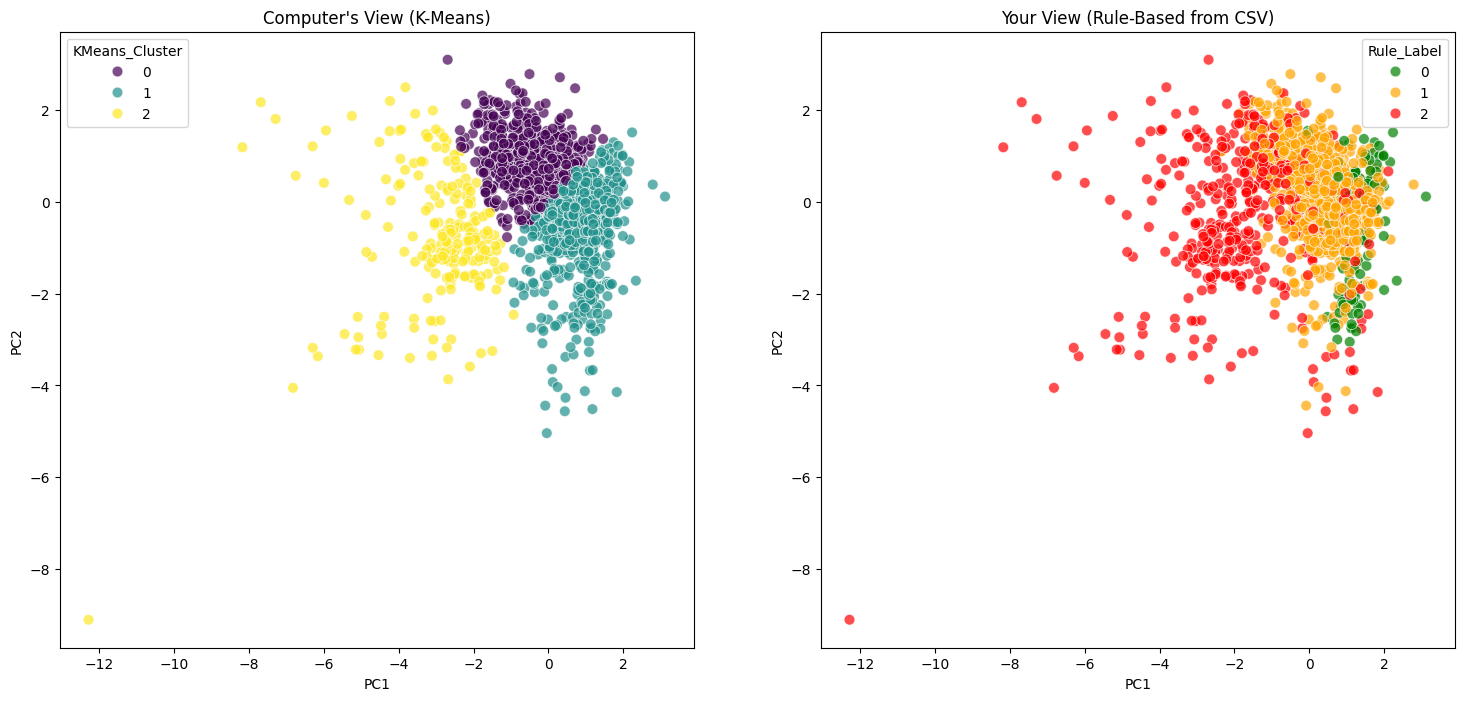

In [18]:
# 5. VISUALIZE COMPARISON
# ---------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: What the Computer found (Unsupervised)
sns.scatterplot(
    ax=axes[0], data=pca_df, x='PC1', y='PC2', 
    hue='KMeans_Cluster', palette='viridis', s=60, alpha=0.7
)
axes[0].set_title("Computer's View (K-Means)")

# Plot 2: What You defined (Rule-Based)
sns.scatterplot(
    ax=axes[1], data=pca_df, x='PC1', y='PC2', 
    hue='Rule_Label', palette={0:'green', 1:'orange', 2:'red'}, s=60, alpha=0.7
)
axes[1].set_title("Your View (Rule-Based from CSV)")

plt.show()

In [19]:
print("\nComparison Matrix:")
print(pd.crosstab(df['Water_Quality'], pca_df['KMeans_Cluster']))


Comparison Matrix:
KMeans_Cluster    0    1    2
Water_Quality                
0                10  147    0
1               500  843    2
2               204   75  210


### Comparison Between Rule-Based Labels and K-Means Clustering

The contingency matrix compares rule-based water quality labels with clusters obtained using K-Means on PCA-transformed, robust-scaled data.

The results show that hazardous water samples exhibit the strongest alignment with a distinct K-Means cluster, indicating that extreme pollution levels form well-separated patterns in feature space. In contrast, potable and unsafe samples display significant overlap across clusters. This suggests that moderate water quality conditions do not form clearly separable groups based solely on statistical similarity.

The “Unsafe” category, in particular, spans multiple clusters, reflecting its transitional nature between potable and hazardous conditions. This highlights a key difference between rule-based classification, which relies on predefined regulatory thresholds, and unsupervised clustering, which groups samples based on geometric proximity without domain constraints.

Overall, the comparison demonstrates that while clustering can effectively identify severely polluted water, rule-based approaches remain more suitable for regulatory decision-making.


In [20]:
# Save the analyzed data to a new CSV
# We include the clusters and PCA coordinates for future reference
pca_df.to_csv("water_dataX_labeled_kmeans.csv", index=False)

print("File saved successfully ")

File saved successfully 


In [21]:
pca_df.to_csv("water_data_scaled_kmeans.csv", index=False)
print("File saved successfully.")


File saved successfully.


In [22]:
df_scaled.to_csv("water_data_scaled_kmeans.csv", index=False)
